### Importing Necessary Packages

In [11]:
using DataFrames
using CSV
using GLM
using StatsBase
using MLBase
using Lathe
using ClassImbalance
using Plots
using StatsPlots
using ROCAnalysis
using Statistics

### Importing Dataset

In [36]:
ENV["COLUMNS"] = 1000

df = DataFrame(CSV.File("data.csv"))                    # Importing dataset
first(df, 5)                                            # Observing first 5 records

5×32 DataFrame
│ Row │ id       │ diagnosis │ radius_mean │ texture_mean │ perimeter_mean │ area_mean │ smoothness_mean │ compactness_mean │ concavity_mean │ concave_points_mean │ symmetry_mean │ fractal_dimension_mean │ radius_se │ texture_se │ perimeter_se │ area_se │ smoothness_se │ compactness_se │ concavity_se │ concave_points_se │ symmetry_se │ fractal_dimension_se │ radius_worst │ texture_worst │ perimeter_worst │ area_worst │ smoothness_worst │ compactness_worst │ concavity_worst │ concave_points_worst │ symmetry_worst │ fractal_dimension_worst │
│     │ Int64    │ String    │ Float64     │ Float64      │ Float64        │ Float64   │ Float64         │ Float64          │ Float64        │ Float64             │ Float64       │ Float64                │ Float64   │ Float64    │ Float64      │ Float64 │ Float64       │ Float64        │ Float64      │ Float64           │ Float64     │ Float64              │ Float64      │ Float64       │ Float64         │ Float64    │ Float64          │ Float64           │ Float64         │ Float64              │ Float64        │ Float64                 │
├─────┼──────────┼───────────┼─────────────┼──────────────┼────────────────┼───────────┼─────────────────┼──────────────────┼────────────────┼─────────────────────┼───────────────┼────────────────────────┼───────────┼────────────┼──────────────┼─────────┼───────────────┼────────────────┼──────────────┼───────────────────┼─────────────┼──────────────────────┼──────────────┼───────────────┼─────────────────┼────────────┼──────────────────┼───────────────────┼─────────────────┼──────────────────────┼────────────────┼─────────────────────────┤
│ 1   │ 842302   │ M         │ 17.99       │ 10.38        │ 122.8          │ 1001.0    │ 0.1184          │ 0.2776           │ 0.3001         │ 0.1471              │ 0.2419        │ 0.07871                │ 1.095     │ 0.9053     │ 8.589        │ 153.4   │ 0.006399      │ 0.04904        │ 0.05373      │ 0.01587           │ 0.03003     │ 0.006193             │ 25.38        │ 17.33         │ 184.6           │ 2019.0     │ 0.1622           │ 0.6656            │ 0.7119          │ 0.2654               │ 0.4601         │ 0.1189                  │
│ 2   │ 842517   │ M         │ 20.57       │ 17.77        │ 132.9          │ 1326.0    │ 0.08474         │ 0.07864          │ 0.0869         │ 0.07017             │ 0.1812        │ 0.05667                │ 0.5435    │ 0.7339     │ 3.398        │ 74.08   │ 0.005225      │ 0.01308        │ 0.0186       │ 0.0134            │ 0.01389     │ 0.003532             │ 24.99        │ 23.41         │ 158.8           │ 1956.0     │ 0.1238           │ 0.1866            │ 0.2416          │ 0.186                │ 0.275          │ 0.08902                 │
│ 3   │ 84300903 │ M         │ 19.69       │ 21.25        │ 130.0          │ 1203.0    │ 0.1096          │ 0.1599           │ 0.1974         │ 0.1279              │ 0.2069        │ 0.05999                │ 0.7456    │ 0.7869     │ 4.585        │ 94.03   │ 0.00615       │ 0.04006        │ 0.03832      │ 0.02058           │ 0.0225      │ 0.004571             │ 23.57        │ 25.53         │ 152.5           │ 1709.0     │ 0.1444           │ 0.4245            │ 0.4504          │ 0.243                │ 0.3613         │ 0.08758                 │
│ 4   │ 84348301 │ M         │ 11.42       │ 20.38        │ 77.58          │ 386.1     │ 0.1425          │ 0.2839           │ 0.2414         │ 0.1052              │ 0.2597        │ 0.09744                │ 0.4956    │ 1.156      │ 3.445        │ 27.23   │ 0.00911       │ 0.07458        │ 0.05661      │ 0.01867           │ 0.05963     │ 0.009208             │ 14.91        │ 26.5          │ 98.87           │ 567.7      │ 0.2098           │ 0.8663            │ 0.6869          │ 0.2575               │ 0.6638         │ 0.173                   │
│ 5   │ 84358402 │ M         │ 20.29       │ 14.34        │ 135.1          │ 1297.0    │ 0.1003          │ 0.1328           │ 0.198          │ 0.1043              

In [37]:
println(size(df))                                       # Examining size of dataset
describe(df)                                            # Observing dataset statistics

(569, 32)


32×8 DataFrame
│ Row │ variable                │ mean      │ min       │ median   │ max       │ nunique │ nmissing │ eltype   │
│     │ Symbol                  │ Union…    │ Any       │ Union…   │ Any       │ Union…  │ Nothing  │ DataType │
├─────┼─────────────────────────┼───────────┼───────────┼──────────┼───────────┼─────────┼──────────┼──────────┤
│ 1   │ id                      │ 3.03718e7 │ 8670      │ 906024.0 │ 911320502 │         │          │ Int64    │
│ 2   │ diagnosis               │           │ B         │          │ M         │ 2       │          │ String   │
│ 3   │ radius_mean             │ 14.1273   │ 6.981     │ 13.37    │ 28.11     │         │          │ Float64  │
│ 4   │ texture_mean            │ 19.2896   │ 9.71      │ 18.84    │ 39.28     │         │          │ Float64  │
│ 5   │ perimeter_mean          │ 91.969    │ 43.79     │ 86.24    │ 188.5     │         │          │ Float64  │
│ 6   │ area_mean               │ 654.889   │ 143.5     │ 551.1    │ 2501.0    │         │          │ Float64  │
│ 7   │ smoothness_mean         │ 0.0963603 │ 0.05263   │ 0.09587  │ 0.1634    │         │          │ Float64  │
│ 8   │ compactness_mean        │ 0.104341  │ 0.01938   │ 0.09263  │ 0.3454    │         │          │ Float64  │
│ 9   │ concavity_mean          │ 0.0887993 │ 0.0       │ 0.06154  │ 0.4268    │         │          │ Float64  │
│ 10  │ concave_points_mean     │ 0.0489191 │ 0.0       │ 0.0335   │ 0.2012    │         │          │ Float64  │
⋮
│ 22  │ fractal_dimension_se    │ 0.0037949 │ 0.0008948 │ 0.003187 │ 0.02984   │         │          │ Float64  │
│ 23  │ radius_worst            │ 16.2692   │ 7.93      │ 14.97    │ 36.04     │         │          │ Float64  │
│ 24  │ texture_worst           │ 25.6772   │ 12.02     │ 25.41    │ 49.54     │         │          │ Float64  │
│ 25  │ perimeter_worst         │ 107.261   │ 50.41     │ 97.66    │ 251.2     │         │          │ Float64  │
│ 26  │ area_worst              │ 880.583   │ 185.2     │ 686.5    │ 4254.0    │         │          │ Float64  │
│ 27  │ smoothness_worst        │ 0.132369  │ 0.07117   │ 0.1313   │ 0.2226    │         │          │ Float64  │
│ 28  │ compactness_worst       │ 0.254265  │ 0.02729   │ 0.2119   │ 1.058     │         │          │ Float64  │
│ 29  │ concavity_worst         │ 0.272188  │ 0.0       │ 0.2267   │ 1.252     │         │          │ Float64  │
│ 30  │ concave_points_worst    │ 0.114606  │ 0.0       │ 0.09993  │ 0.291     │         │          │ Float64  │
│ 31  │ symmetry_worst          │ 0.290076  │ 0.1565    │ 0.2822   │ 0.6638    │         │          │ Float64  │
│ 32  │ fractal_dimension_worst │ 0.0839458 │ 0.05504   │ 0.08004  │ 0.2075    │         │          │ Float64  │

In [38]:
println(names(df))                                      # Viewing column names

[:id, :diagnosis, :radius_mean, :texture_mean, :perimeter_mean, :area_mean, :smoothness_mean, :compactness_mean, :concavity_mean, :concave_points_mean, :symmetry_mean, :fractal_dimension_mean, :radius_se, :texture_se, :perimeter_se, :area_se, :smoothness_se, :compactness_se, :concavity_se, :concave_points_se, :symmetry_se, :fractal_dimension_se, :radius_worst, :texture_worst, :perimeter_worst, :area_worst, :smoothness_worst, :compactness_worst, :concavity_worst, :concave_points_worst, :symmetry_worst, :fractal_dimension_worst]


In [40]:
println("Rows: ", size(df, 1))
println("Columns: ", size(df, 2))

Rows: 569
Columns: 32


In [16]:
unique(df.diagnosis)                                    # Observing unique values in the output column

2-element Array{String,1}:
 "M"
 "B"

### One Hot Encoding

In [17]:
Lathe.preprocess.OneHotEncode(df, :diagnosis)           # Performing One Hot Encoding (As output column has categorical values)
select!(df, Not([:id, :diagnosis, :B]))                 # Removing string columns and columns leading to Dummy variable trap
rename!(df,:M => :cancer)                               # Renaming output column
first(df, 5)                                            # Observing dataset after modification

5×31 DataFrame
│ Row │ radius_mean │ texture_mean │ perimeter_mean │ area_mean │ smoothness_mean │ compactness_mean │ concavity_mean │ concave_points_mean │ symmetry_mean │ fractal_dimension_mean │ radius_se │ texture_se │ perimeter_se │ area_se │ smoothness_se │ compactness_se │ concavity_se │ concave_points_se │ symmetry_se │ fractal_dimension_se │ radius_worst │ texture_worst │ perimeter_worst │ area_worst │ smoothness_worst │ compactness_worst │ concavity_worst │ concave_points_worst │ symmetry_worst │ fractal_dimension_worst │ cancer │
│     │ Float64     │ Float64      │ Float64        │ Float64   │ Float64         │ Float64          │ Float64        │ Float64             │ Float64       │ Float64                │ Float64   │ Float64    │ Float64      │ Float64 │ Float64       │ Float64        │ Float64      │ Float64           │ Float64     │ Float64              │ Float64      │ Float64       │ Float64         │ Float64    │ Float64          │ Float64           │ Float64         │ Float64              │ Float64        │ Float64                 │ Bool   │
├─────┼─────────────┼──────────────┼────────────────┼───────────┼─────────────────┼──────────────────┼────────────────┼─────────────────────┼───────────────┼────────────────────────┼───────────┼────────────┼──────────────┼─────────┼───────────────┼────────────────┼──────────────┼───────────────────┼─────────────┼──────────────────────┼──────────────┼───────────────┼─────────────────┼────────────┼──────────────────┼───────────────────┼─────────────────┼──────────────────────┼────────────────┼─────────────────────────┼────────┤
│ 1   │ 17.99       │ 10.38        │ 122.8          │ 1001.0    │ 0.1184          │ 0.2776           │ 0.3001         │ 0.1471              │ 0.2419        │ 0.07871                │ 1.095     │ 0.9053     │ 8.589        │ 153.4   │ 0.006399      │ 0.04904        │ 0.05373      │ 0.01587           │ 0.03003     │ 0.006193             │ 25.38        │ 17.33         │ 184.6           │ 2019.0     │ 0.1622           │ 0.6656            │ 0.7119          │ 0.2654               │ 0.4601         │ 0.1189                  │ 1      │
│ 2   │ 20.57       │ 17.77        │ 132.9          │ 1326.0    │ 0.08474         │ 0.07864          │ 0.0869         │ 0.07017             │ 0.1812        │ 0.05667                │ 0.5435    │ 0.7339     │ 3.398        │ 74.08   │ 0.005225      │ 0.01308        │ 0.0186       │ 0.0134            │ 0.01389     │ 0.003532             │ 24.99        │ 23.41         │ 158.8           │ 1956.0     │ 0.1238           │ 0.1866            │ 0.2416          │ 0.186                │ 0.275          │ 0.08902                 │ 1      │
│ 3   │ 19.69       │ 21.25        │ 130.0          │ 1203.0    │ 0.1096          │ 0.1599           │ 0.1974         │ 0.1279              │ 0.2069        │ 0.05999                │ 0.7456    │ 0.7869     │ 4.585        │ 94.03   │ 0.00615       │ 0.04006        │ 0.03832      │ 0.02058           │ 0.0225      │ 0.004571             │ 23.57        │ 25.53         │ 152.5           │ 1709.0     │ 0.1444           │ 0.4245            │ 0.4504          │ 0.243                │ 0.3613         │ 0.08758                 │ 1      │
│ 4   │ 11.42       │ 20.38        │ 77.58          │ 386.1     │ 0.1425          │ 0.2839           │ 0.2414         │ 0.1052              │ 0.2597        │ 0.09744                │ 0.4956    │ 1.156      │ 3.445        │ 27.23   │ 0.00911       │ 0.07458        │ 0.05661      │ 0.01867           │ 0.05963     │ 0.009208             │ 14.91        │ 26.5          │ 98.87           │ 567.7      │ 0.2098           │ 0.8663            │ 0.6869          │ 0.2575               │ 0.6638         │ 0.173                   │ 1      │
│ 5   │ 20.29       │ 14.34        │ 135.1          │ 1297.0    │ 0.1003          │ 0.1328           │ 0.198          │ 0.1043              │ 0.1809        │ 0.05883                │ 0.7572    │ 0.7813     │ 5.438        │ 94.44   │ 0.01149       │ 0.02461     

### Feature Elimination

In [18]:
# Printing correlation of different columns with output column

for col in names(df)
    println(col, " : ", cor(df.cancer, df[col]))
end

radius_mean : 0.7300285113754562
texture_mean : 0.4151852998452043
perimeter_mean : 0.7426355297258328
area_mean : 0.7089838365853895
smoothness_mean : 0.3585599650859318
compactness_mean : 0.596533677508253
concavity_mean : 0.6963597071719055
concave_points_mean : 0.7766138400204352
symmetry_mean : 0.33049855426254704
fractal_dimension_mean : -0.012837602698432399
radius_se : 0.5671338208247174
texture_se : -0.008303332973877402
perimeter_se : 0.5561407034314828
area_se : 0.548235940278024
smoothness_se : -0.06701601057948728
compactness_se : 0.29299924424885815
concavity_se : 0.25372976598083014
concave_points_se : 0.4080423327165045
symmetry_se : -0.00652175587064794
fractal_dimension_se : 0.0779724173902561
radius_worst : 0.7764537785950392
texture_worst : 0.45690282139679805
perimeter_worst : 0.7829141371737588
area_worst : 0.7338250349210507
smoothness_worst : 0.42146486106640246
compactness_worst : 0.5909982378417916
concavity_worst : 0.6596102103692327
concave_points_worst : 0.

In [19]:
# Removing columns with least correlations with the output column from dataset

select!(df, Not([:fractal_dimension_mean, :texture_se, :smoothness_se, :symmetry_se, :fractal_dimension_se]));

### Data Visualisation

In [20]:
# Creating separate dataframes based on output variable for plotting graphs

df_M = filter(x -> x.cancer == 1, df)
df_B = filter(x -> x.cancer == 0, df);

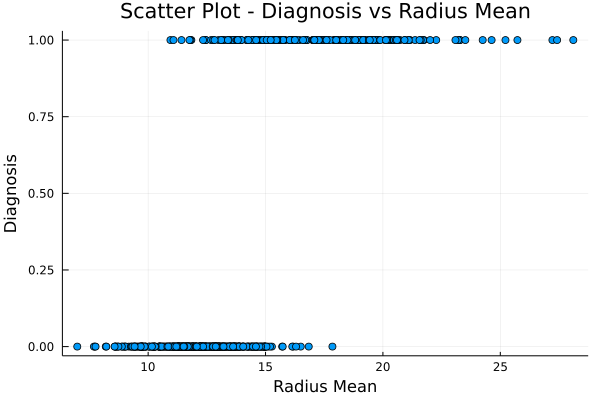

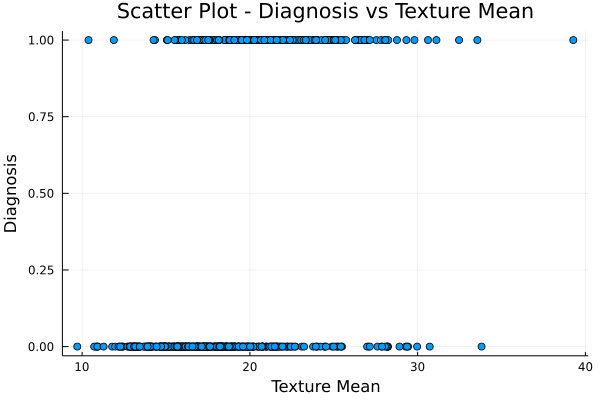

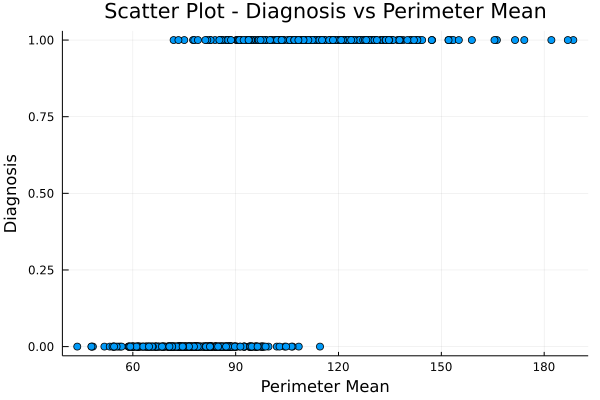

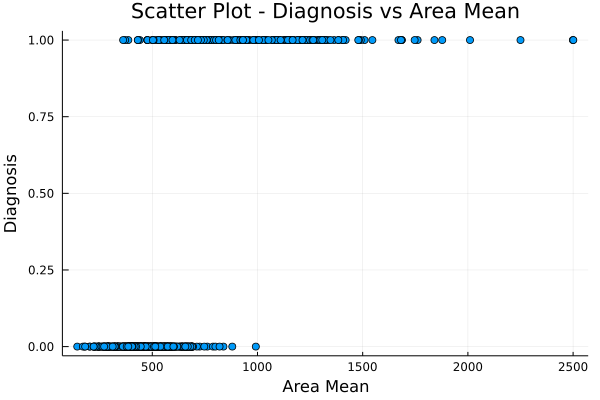

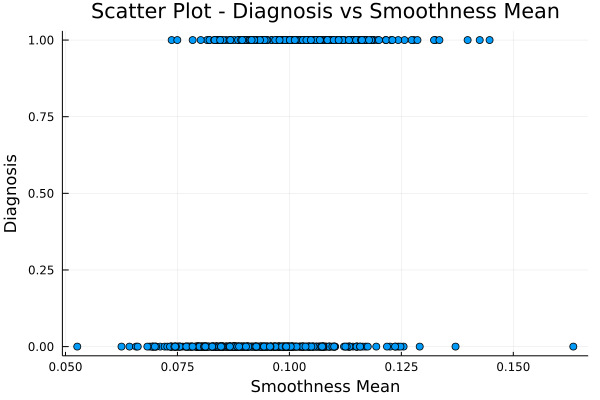

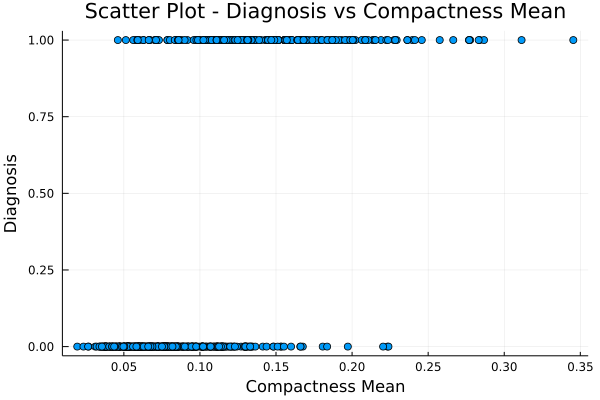

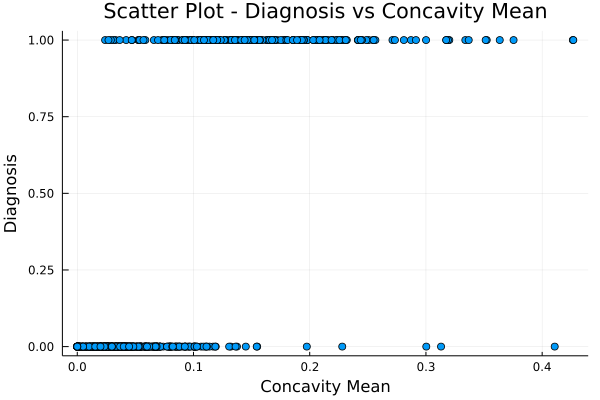

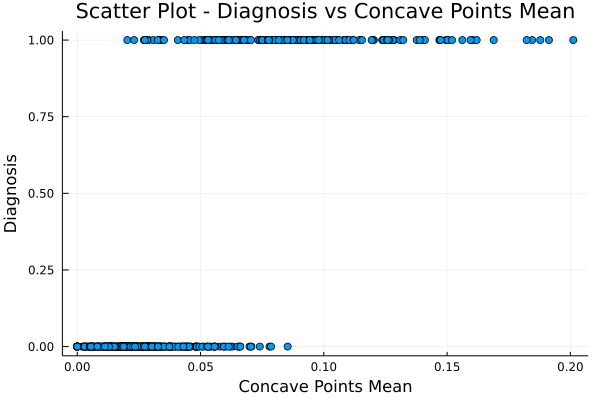

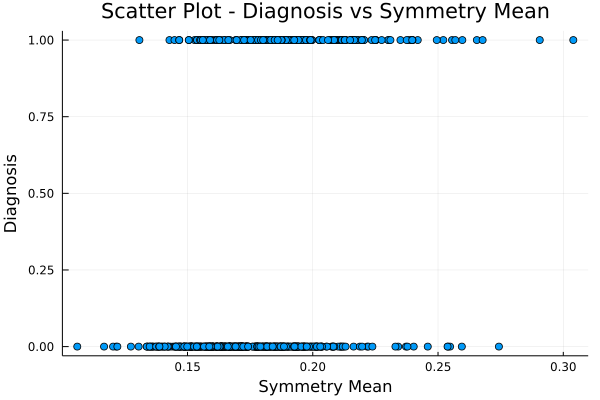

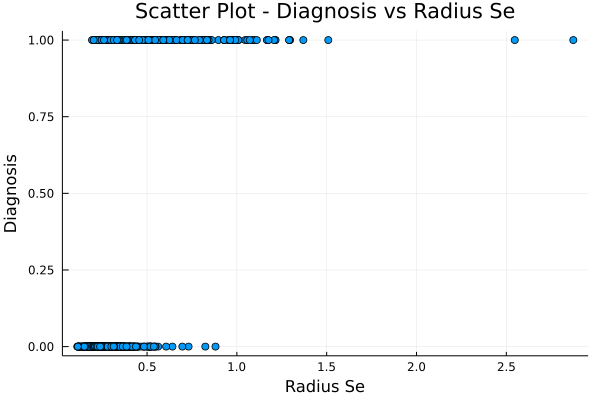

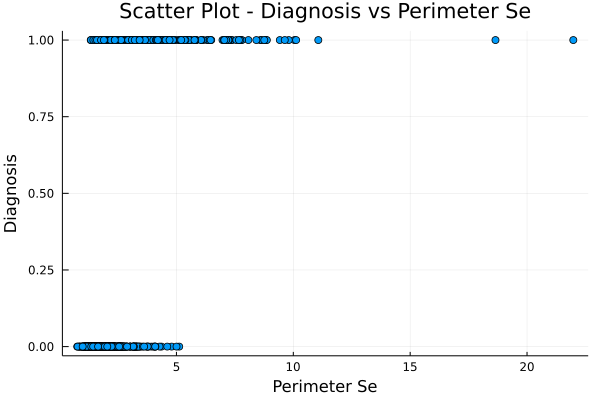

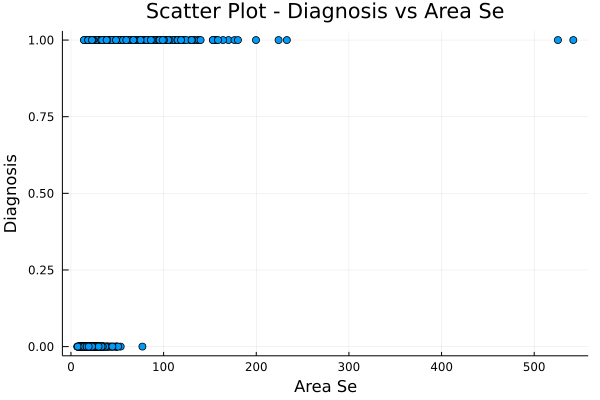

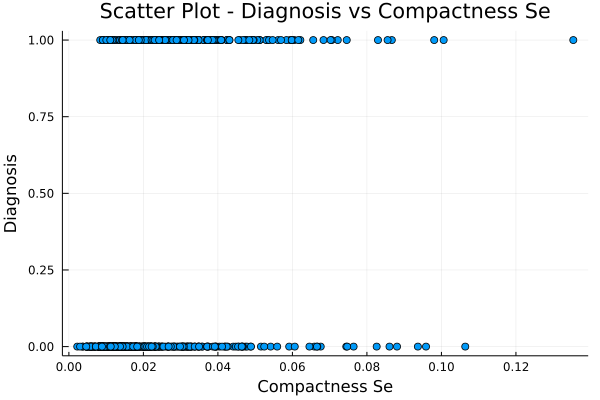

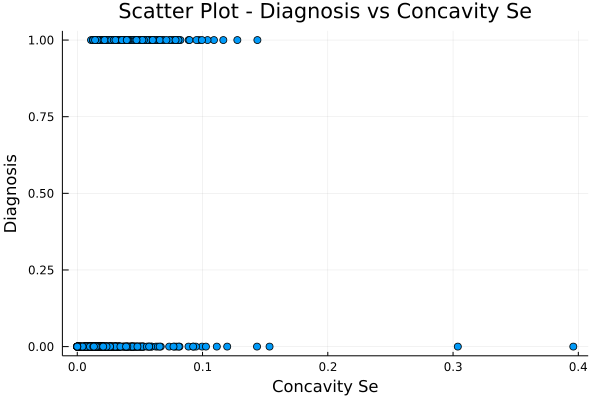

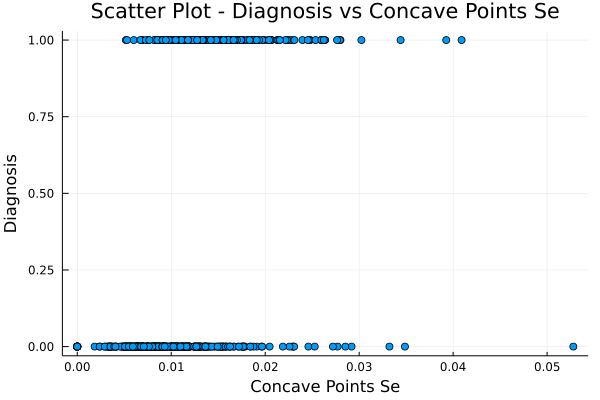

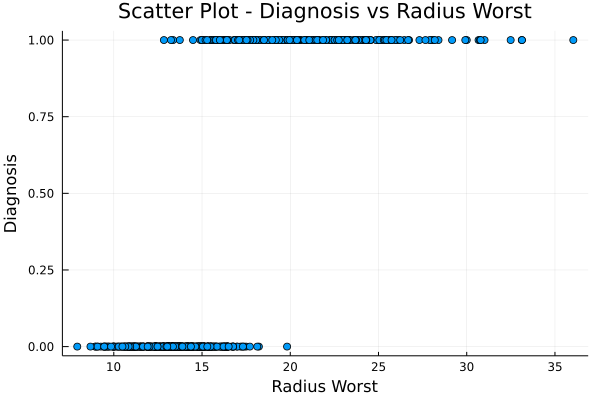

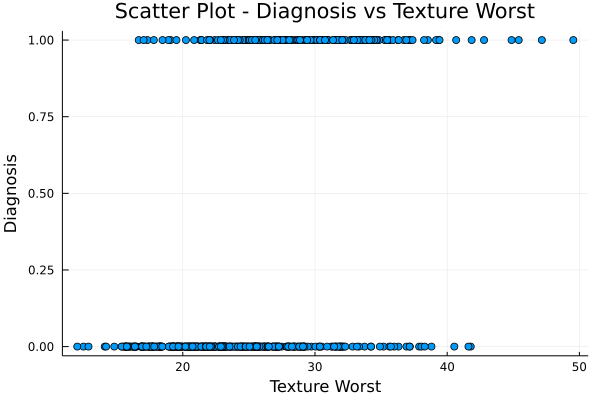

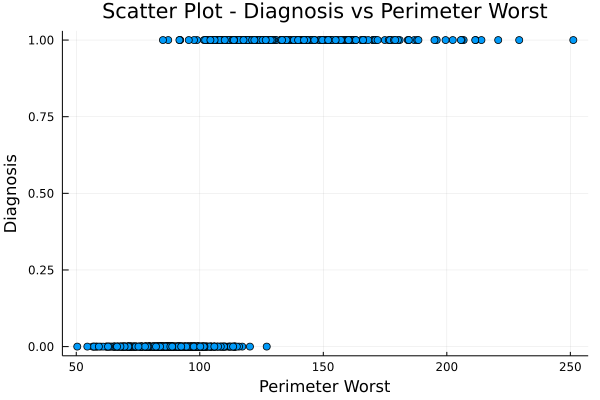

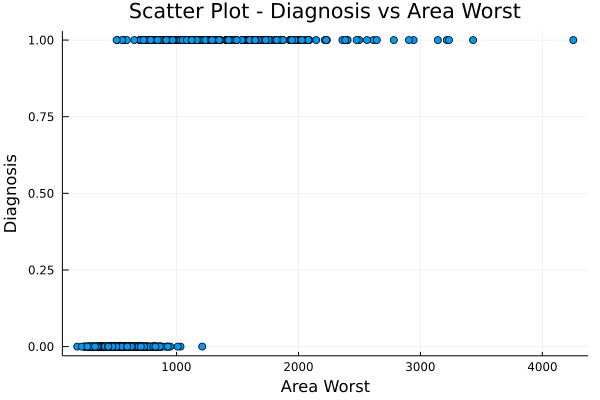

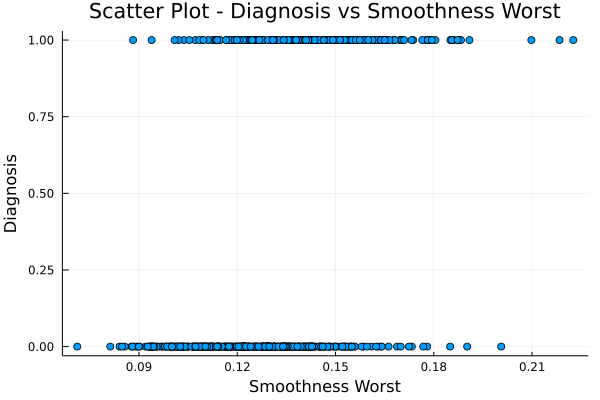

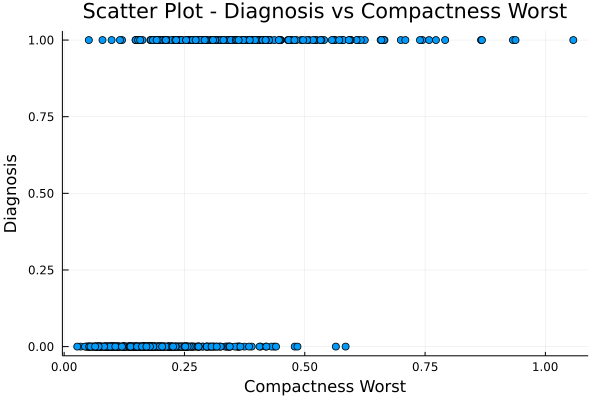

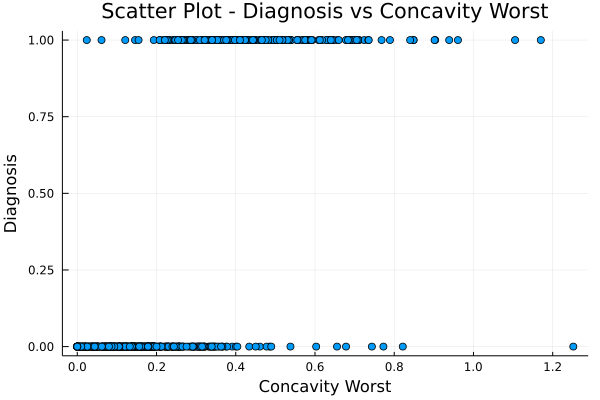

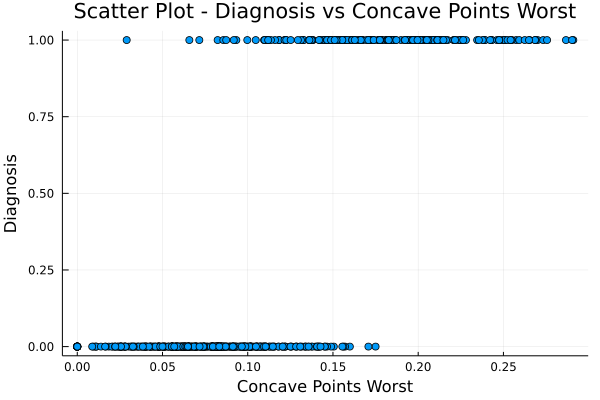

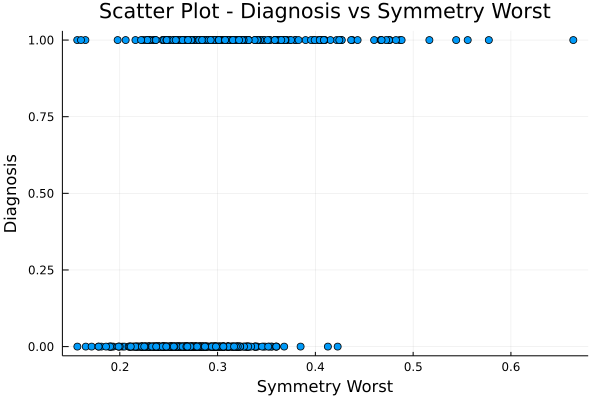

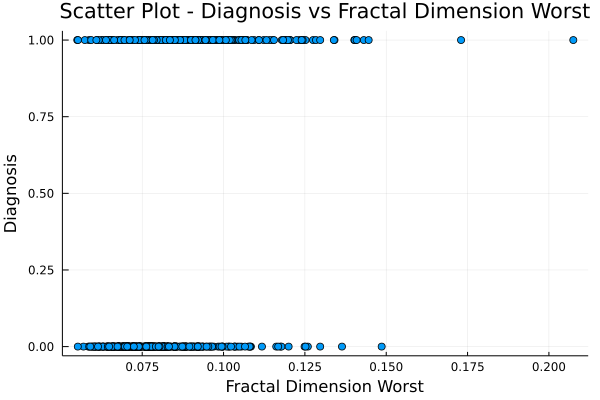

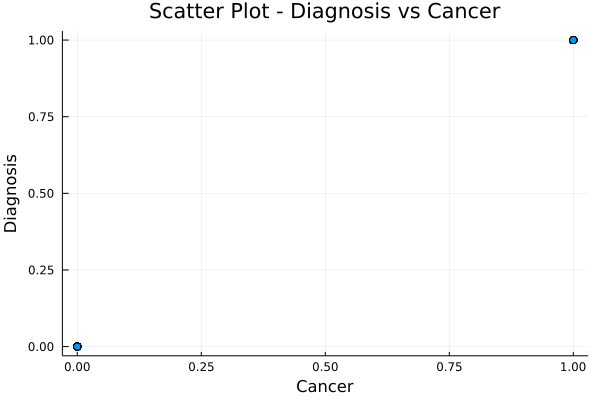

In [21]:
# Plotting graphs between different features and output variable

for col in names(df)
    temp_col = titlecase(replace(strip(string(col)), "_" => " "))
    display(scatter(df[col], df.cancer, title = "Scatter Plot - Diagnosis vs $temp_col", ylabel = "Diagnosis", xlabel = "$temp_col", legend = false))
end

In [22]:
# Plotting graphs between different features and output variable
# Uncomment to plot graphs
#=
for col1 in names(df)
    for col2 in names(df)
        if col1 != col2 && col1 != "Cancer" && col2 != "Cancer"
            temp_col1 = titlecase(replace(strip(string(col1)), "_" => " "))
            temp_col2 = titlecase(replace(strip(string(col2)), "_" => " "))
            scatter(df_M[col1], df_M[col2], title = "Scatter Plot - $temp_col1 vs $temp_col2", xlabel = "$temp_col1", ylabel = "$temp_col2", legend = true, label = "Malignant", color = [:orange])
            display(scatter!(df_B[col1], df_B[col2], title = "Scatter Plot - $temp_col1 vs $temp_col2", xlabel = "$temp_col1", ylabel = "$temp_col2", legend = true, label = "Benign", color = [:green]))
        end
    end
end
=#

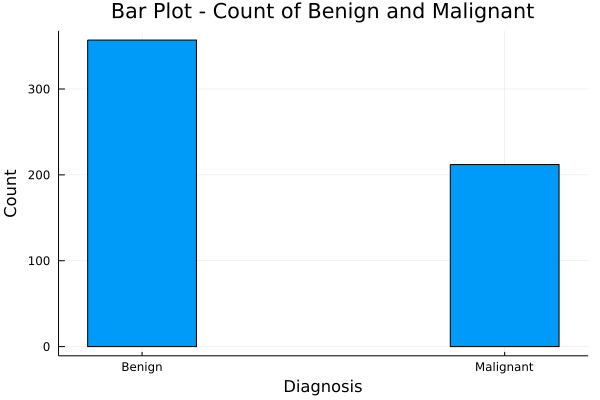

In [23]:
# Count plot of Benign and Malignant

bar(["Benign", "Malignant"], [size(df_B, 1), size(df_M, 1)], bar_width = 0.3, xlabel = "Diagnosis", ylabel = "Count", legend = false, title = "Bar Plot - Count of Benign and Malignant")

### Splitting Data

In [24]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df, .75)                   # Splitting dataset into training set (75 %) and testing set (25 %)

(449×26 DataFrame
│ Row │ radius_mean │ texture_mean │ perimeter_mean │ area_mean │ smoothness_mean │ compactness_mean │ concavity_mean │ concave_points_mean │ symmetry_mean │ radius_se │ perimeter_se │ area_se │ compactness_se │ concavity_se │ concave_points_se │ radius_worst │ texture_worst │ perimeter_worst │ area_worst │ smoothness_worst │ compactness_worst │ concavity_worst │ concave_points_worst │ symmetry_worst │ fractal_dimension_worst │ cancer │
│     │ Float64     │ Float64      │ Float64        │ Float64   │ Float64         │ Float64          │ Float64        │ Float64             │ Float64       │ Float64   │ Float64      │ Float64 │ Float64        │ Float64      │ Float64           │ Float64      │ Float64       │ Float64         │ Float64    │ Float64          │ Float64           │ Float64         │ Float64              │ Float64        │ Float64                 │ Bool   │
├─────┼─────────────┼──────────────┼────────────────┼───────────┼─────────────────┼─────────────────

In [25]:
println(names(df))                                      # Printing column names

[:radius_mean, :texture_mean, :perimeter_mean, :area_mean, :smoothness_mean, :compactness_mean, :concavity_mean, :concave_points_mean, :symmetry_mean, :radius_se, :perimeter_se, :area_se, :compactness_se, :concavity_se, :concave_points_se, :radius_worst, :texture_worst, :perimeter_worst, :area_worst, :smoothness_worst, :compactness_worst, :concavity_worst, :concave_points_worst, :symmetry_worst, :fractal_dimension_worst, :cancer]


### Building the Model

In [26]:
fm = @formula(cancer ~ radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + radius_se + perimeter_se + area_se + compactness_se + concavity_se + concave_points_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

cancer ~ 1 + radius_mean + texture_mean + perimeter_mean + area_mean + smoothness_mean + compactness_mean + concavity_mean + concave_points_mean + symmetry_mean + radius_se + perimeter_se + area_se + compactness_se + concavity_se + concave_points_se + radius_worst + texture_worst + perimeter_worst + area_worst + smoothness_worst + compactness_worst + concavity_worst + concave_points_worst + symmetry_worst + fractal_dimension_worst

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────────────
                               Coef.     Std. Error      z  Pr(>|z|)        Lower 95%      Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)              -1196.39   

### Predictions

In [27]:
prediction = predict(logit, test);                       # Predicting results on testing data

In [28]:
# Converting probability score to class

prediction_class = [if x < 0.5 0 else 1 end for  x in prediction];
    
prediction_df = DataFrame(y_actual = test.cancer, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted

120-element BitArray{1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

### Model Evaluation

In [29]:
accuracy = mean(prediction_df.correctly_classified)                # Checking accuracy of the model

0.9333333333333333

In [30]:
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)            # Observing confusion matrix

ROCNums{Int64}
  p = 45
  n = 75
  tp = 42
  tn = 70
  fp = 5
  fn = 3
